# Task 1: Time Series Analysis (Sales Forecasting using ARIMA)

# Load and Explore the Dataset

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("C:/Users/jaivi/Downloads/sales_data.csv", parse_dates=["Date"], index_col="Date")

# Ensure the index has a defined frequency
df = df.asfreq('D')

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())


            Sales
Date             
2023-01-01    214
2023-01-02    219
2023-01-03    303
2023-01-04    489
2023-01-05    477
Sales    0
dtype: int64


# Visualize Sales Trends

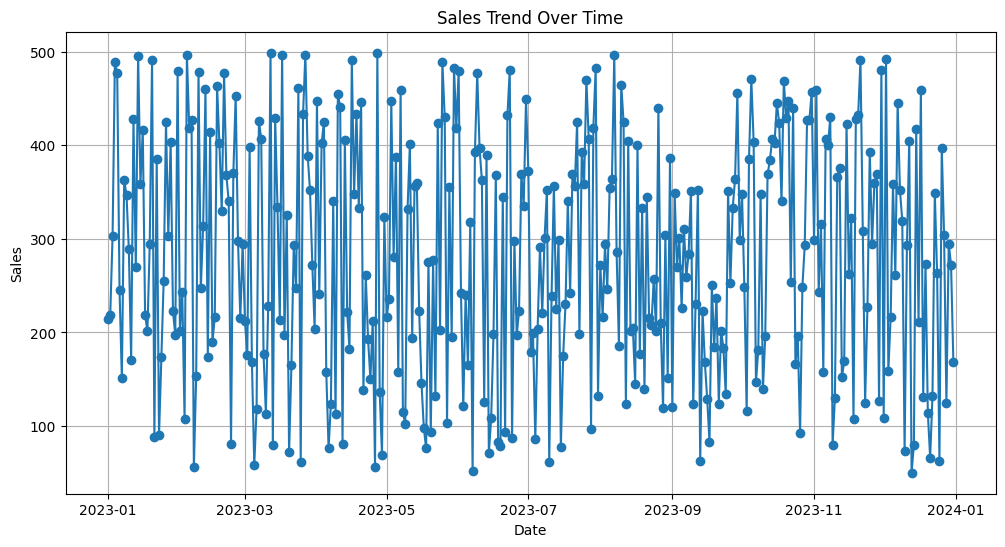

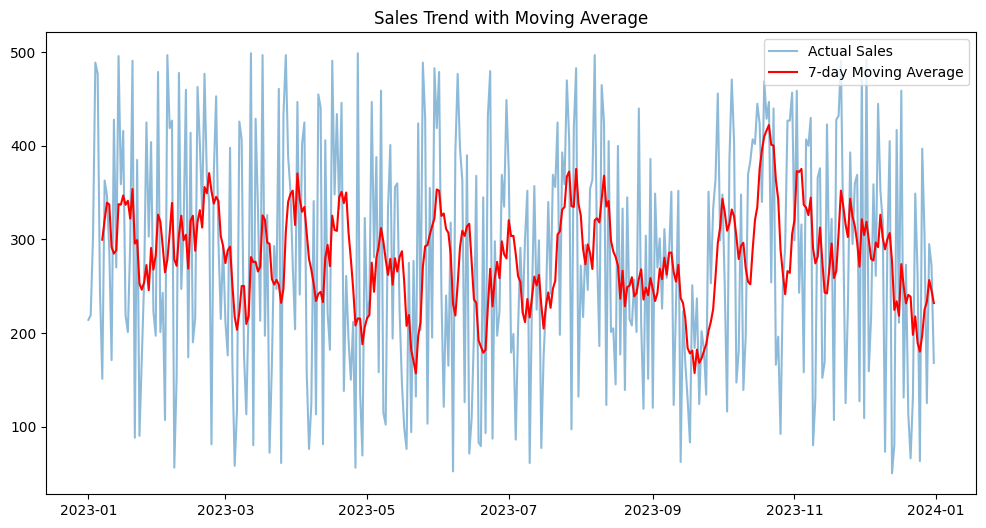

In [67]:
# Plot sales data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()

# Moving Average for smoothing trends
df['Sales_MA'] = df['Sales'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label="Actual Sales", alpha=0.5)
plt.plot(df.index, df['Sales_MA'], label="7-day Moving Average", color='red')
plt.title("Sales Trend with Moving Average")
plt.legend()
plt.show()


# Train an ARIMA Model for Forecasting

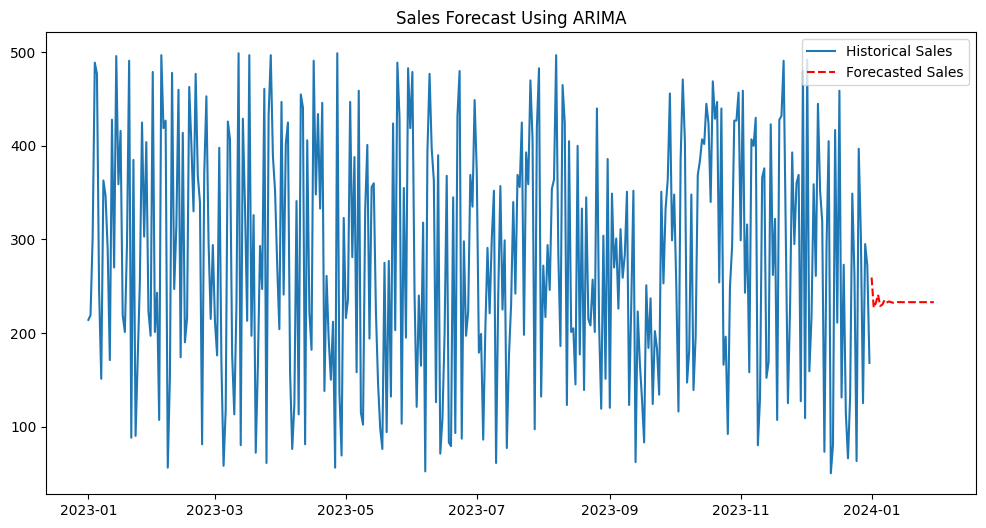

                 Date  Predicted Sales
2024-01-01 2024-01-01       259.278246
2024-01-02 2024-01-02       226.935725
2024-01-03 2024-01-03       232.183056
2024-01-04 2024-01-04       240.897344
2024-01-05 2024-01-05       228.869655
2024-01-06 2024-01-06       230.280069
2024-01-07 2024-01-07       234.971866
2024-01-08 2024-01-08       232.394539
2024-01-09 2024-01-09       233.673939
2024-01-10 2024-01-10       232.992308
2024-01-11 2024-01-11       232.305941
2024-01-12 2024-01-12       232.983145
2024-01-13 2024-01-13       233.082409
2024-01-14 2024-01-14       232.950232
2024-01-15 2024-01-15       232.974593
2024-01-16 2024-01-16       232.857021
2024-01-17 2024-01-17       232.892003
2024-01-18 2024-01-18       232.957757
2024-01-19 2024-01-19       232.943538
2024-01-20 2024-01-20       232.930635
2024-01-21 2024-01-21       232.922157
2024-01-22 2024-01-22       232.919341
2024-01-23 2024-01-23       232.930181
2024-01-24 2024-01-24       232.932709
2024-01-25 2024-01-25    

In [69]:
# Train ARIMA Model
model = ARIMA(df['Sales'], order=(5,1,0))  # (p,d,q) values can be tuned
model_fit = model.fit()

# Generate Forecasts
forecast_steps = 30  # Predict the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Create Future Dates
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label="Historical Sales")
plt.plot(future_dates, forecast, label="Forecasted Sales", linestyle='dashed', color='red')
plt.title("Sales Forecast Using ARIMA")
plt.legend()
plt.show()

# Print Forecasted Values
forecast_df = pd.DataFrame({"Date": future_dates, "Predicted Sales": forecast})
print(forecast_df)


# Validate the Model

In [71]:
# Splitting data for validation
train_size = int(len(df) * 0.8)
train, test = df['Sales'][:train_size], df['Sales'][train_size:]

# Train ARIMA on train data
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Predict
test_pred = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, test_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 186.33447024864248


# Task 2: Predicting Heart Disease Using Logistic Regression

# Load and Explore the Dataset

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("C:/Users/jaivi/Downloads/heart_disease.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df = df.dropna()

# Convert categorical columns (if needed)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Check the updated dataset
print(df.head())


   Age  Gender  Cholesterol  Blood Pressure  Heart Disease
0   68  Female          267             150              1
1   58    Male          293             106              1
2   44    Male          157             163              0
3   72  Female          281             146              1
4   37    Male          253             144              1
Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64
   Age  Gender  Cholesterol  Blood Pressure  Heart Disease
0   68       0          267             150              1
1   58       1          293             106              1
2   44       1          157             163              0
3   72       0          281             146              1
4   37       1          253             144              1


# Feature Scaling

In [76]:
# Define features and target variable
X = df[['Age', 'Gender', 'Cholesterol', 'Blood Pressure']]
y = df['Heart Disease']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check dataset shapes
print(X_train.shape, X_test.shape)


(400, 4) (100, 4)


# Train Logistic Regression Model

In [78]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)


# Model Evaluation

Confusion Matrix:
 [[20 36]
 [10 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.36      0.47        56
           1       0.49      0.77      0.60        44

    accuracy                           0.54       100
   macro avg       0.58      0.56      0.53       100
weighted avg       0.59      0.54      0.52       100



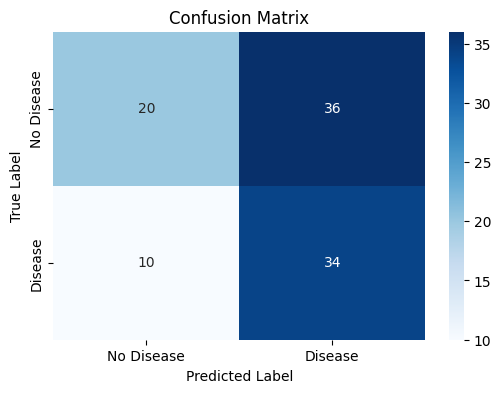

In [80]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
